# Training

In [1]:
# Import all packages

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import sys
%matplotlib inline

In [2]:
# chdir. it depends on the platform
if sys.platform == 'linux':
    # if os is linux cd to
    project_path = "/home/mate/develop/PycharmProjects/GeFace/"
elif sys.platform is 'windows':
    pass
else:
    pass

os.chdir(project_path)

In [3]:
try:
    print(os.getcwd())
    # Open CSV with all informations
    csv_file = pd.read_csv("faces_colored/faces_correct.csv",delimiter = ',', encoding = "ISO-8859-1", engine='python')
    pd.set_option('display.max_columns', 100)
except (FileNotFoundError):
    print("CSV file not found")
    current_path = os.getcwd()
    print("Current path is " + current_path)

/home/mate/develop/PycharmProjects/GeFace


In [4]:
csv_file.head()

,nr,age,full_path,gender
0,0,69,01/nm0000001_rm124825600_1899-5-10_1968.jpg,1.0
1,1,71,01/nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0
2,2,69,01/nm0000001_rm577153792_1899-5-10_1968.jpg,1.0
3,5,67,02/nm0000002_rm1075631616_1924-9-16_1991.jpg,0.0
4,6,80,02/nm0000002_rm1346607872_1924-9-16_2004.jpg,0.0


In [5]:
df = csv_file.drop(columns=["nr"])

In [6]:
df.head()

,age,full_path,gender
0,69,01/nm0000001_rm124825600_1899-5-10_1968.jpg,1.0
1,71,01/nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0
2,69,01/nm0000001_rm577153792_1899-5-10_1968.jpg,1.0
3,67,02/nm0000002_rm1075631616_1924-9-16_1991.jpg,0.0
4,80,02/nm0000002_rm1346607872_1924-9-16_2004.jpg,0.0


In [7]:
# create dataset for testing the network
import random
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler


proba_df = df.head(1000)

# Randomize but always the same random numbers
np.random.seed(42)
random.seed(42)
# shuffle rows
proba_df = shuffle(proba_df)

In [8]:
proba_df.head()

,age,full_path,gender
521,33,62/nm0000062_rm360689664_1935-1-8_1968.jpg,1.0
737,37,84/nm0000084_rm3788019968_1965-12-31_2002.jpg,0.0
740,37,84/nm0000084_rm3838351616_1965-12-31_2002.jpg,0.0
660,26,79/nm0000079_rm2756104448_1940-9-5_1966.jpg,0.0
411,57,56/nm0000056_rm1541314816_1925-1-26_1982.jpg,1.0


In [9]:
# calculate test train valid data numbers
test_num = int(np.floor(0.1 * proba_df.shape[0]))
valid_num = int(np.floor(0.2 * proba_df.shape[0]))
train_num = int(proba_df.shape[0] - test_num - valid_num)
print("train: {} | valid: {} | test: {}".format(train_num, valid_num, test_num))

train: 700 | valid: 200 | test: 100


In [10]:
# split the data into train valid and test data
train_data = proba_df.iloc[0:train_num, :]
train_data.shape

valid_data = proba_df.iloc[train_num:train_num + valid_num, :]
valid_data.shape

test_data = proba_df.iloc[ train_num+valid_num:, :]
test_data.shape

(100, 3)

In [11]:
image_path = "faces_colored/"
x_train_p = image_path + train_data['full_path'].values
x_valid_p = image_path + valid_data['full_path'].values
x_test_p = image_path + test_data['full_path'].values

# x_train_l = image_path + train_data['age'].values
# x_valid_l = image_path + train_data['age'].values
# x_test_l = image_path + train_data['age'].values

x_test_p.shape
x_test_p[0]

'faces_colored/92/nm0000092_rm2154539520_1939-10-27_1975.jpg'

In [12]:
# get the ages
y_train = train_data['age'].values
y_valid = valid_data['age'].values
y_test = test_data['age'].values

# Copy train, valid, test data into a new folder

In [13]:
proba_df.head()

,age,full_path,gender
521,33,62/nm0000062_rm360689664_1935-1-8_1968.jpg,1.0
737,37,84/nm0000084_rm3788019968_1965-12-31_2002.jpg,0.0
740,37,84/nm0000084_rm3838351616_1965-12-31_2002.jpg,0.0
660,26,79/nm0000079_rm2756104448_1940-9-5_1966.jpg,0.0
411,57,56/nm0000056_rm1541314816_1925-1-26_1982.jpg,1.0


In [14]:
from shutil import copyfile, copy2
try:
    os.mkdir("test_face")
except FileExistsError:
    print("test_face Direcotry exist")
    
# training 
try:
    os.mkdir("train_face")
    # create directory structure
    
    
except FileExistsError:
    print("train_face Direcotry exist")
    
for i in range(100):
    try:
        if i < 10:
        
            os.mkdir("train_face/0" + str(i))
        else:
            os.mkdir("train_face/" + str(i))
    except FileExistsError:
        continue
i = 0
dest_path = "train_face/"+train_data['full_path'].values
for p in x_train_p:
    
    copy2(p, dest_path[i])
    i += 1
#     print("train_face/"+train_data['full_path'].values)
#     print(dest_path[i])

# validation
try:
    os.mkdir("valid_face")
    # create directory structure
    
    for i in range(100):
        try:
            if i < 10:
            
                os.mkdir("valid_face/0" + str(i))
            else:
                os.mkdir("valid_face/" + str(i))
        except FileExistsError:
            continue
except FileExistsError:
    print("valid_face Direcotry exist")
    
i = 0
dest_path = "valid_face/"+valid_data['full_path'].values
for p in x_valid_p:
    
    copy2(p, dest_path[i])
    i += 1
#     print("train_face/"+train_data['full_path'].values)
#     print(dest_path[i])

# Training and model building

In [3]:
# import the necessary packages
import sys
import os
import PIL
from keras.layers import *
from keras.optimizers import *
from keras.applications import *
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")
 
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
# from pyimagesearch.smallervggnet import SmallerVGGNet
import matplotlib.pyplot as plt
# from imutils import paths
import numpy as np
import argparse
import random
import pickle
import cv2
import os

Using TensorFlow backend.
/home/mate/.virtualenvs/deeplearn_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/mate/.virtualenvs/deeplearn_cpu/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/mate/.virtualenvs/deeplearn_cpu/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/mate/.virtualenvs/deeplearn_cpu/lib/python3.6/site-pac

In [16]:
class SmallerVGGNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be
        # "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1
 
        # if we are using "channels first", update the input shape
        # and channels dimension
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1
            
        # CONV => RELU => POOL
        model.add(Conv2D(32, (3, 3), padding="same",
            input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(3, 3)))
        model.add(Dropout(0.25))
        
        # (CONV => RELU) * 2 => POOL
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        
        # (CONV => RELU) * 2 => POOL
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        
        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(1024))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        print("mknlm")
        # softmax classifier
        model.add(Dense(classes))
        print("ffjseoijwojdowq")
        model.add(Activation("softmax"))
 
        # return the constructed network architecture
        return model

In [17]:
# fix seed for reproducible results (only works on CPU, not GPU)
seed = 42
np.random.seed(seed=seed)
tf.set_random_seed(seed=seed)

In [18]:
# initialize the number of epochs to train for, initial learning rate,
# batch size, and image dimensions
EPOCHS = 1
INIT_LR = 1e-3
BS = 32
IMAGE_DIMS = (96, 96, 3)
 
# initialize the data and labels
train_x = []
train_y = []

valid_x = []
valid_y = []


In [19]:
# train
# loop over the input images
i = 0
train_y = y_train
for imagePath in x_train_p:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = img_to_array(image)
    train_x.append(image)
    
# valid
# loop over the input images
i = 0
valid_y = y_valid
for imagePath in x_valid_p:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = img_to_array(image)
    valid_x.append(image)
 

In [20]:
train_y = train_y.astype("str")
valid_y = valid_y.astype("str")


In [21]:
# scale the raw pixel intensities to the range [0, 1]
train_x = np.array(train_x, dtype="float") / 255.0
train_y = np.array(train_y)
# print(train_y)
print("[INFO] data matrix: {:.2f}MB".format(
	train_x.nbytes / (1024 * 1000.0)))
 
# binarize the labels
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
 
# scale the raw pixel intensities to the range [0, 1]
valid_x = np.array(valid_x, dtype="float") / 255.0
valid_y = np.array(valid_y)
print("[INFO] data matrix: {:.2f}MB".format(
	valid_x.nbytes / (1024 * 1000.0)))
 
# binarize the labels
# lb1 = LabelBinarizer()
valid_y = lb.transform(valid_y)

print(len(train_x))
print(len(train_y))
print(len(valid_x))
print(len(valid_y))

[INFO] data matrix: 151.20MB
[INFO] data matrix: 43.20MB
700
700
200
200


In [22]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")

In [23]:
# initialize the model
print(len(lb.classes_))
print("[INFO] compiling model...")
model = SmallerVGGNet.build(width=IMAGE_DIMS[1], height=IMAGE_DIMS[0],
	depth=IMAGE_DIMS[2], classes=len(lb.classes_))
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
 
# train the network
print("[INFO] training network...")
H = model.fit_generator(
 	aug.flow(train_x, train_y, batch_size=BS),
	validation_data=(valid_x, valid_y),
	steps_per_epoch=len(train_x) // BS,
	epochs=50, verbose=1)


# save the model to disk
print("[INFO] serializing network...")
model.save(project_path+"model.hdf5")
 
# save the label binarizer to disk
print("[INFO] serializing label binarizer...")
f = open(project_path+"label.label", "wb")
f.write(pickle.dumps(lb))
f.close()

65
[INFO] compiling model...
mknlm
ffjseoijwojdowq
[INFO] training network...
Epoch 1/50
21/21 [==============================] - 8s 372ms/step - loss: 5.6412 - acc: 0.0298 - val_loss: 6.7589 - val_acc: 0.0600
Epoch 2/50
21/21 [==============================] - 3s 150ms/step - loss: 4.7192 - acc: 0.0657 - val_loss: 6.1751 - val_acc: 0.0850
Epoch 3/50
21/21 [==============================] - 3s 139ms/step - loss: 4.5736 - acc: 0.0568 - val_loss: 5.8923 - val_acc: 0.0450
Epoch 4/50
21/21 [==============================] - 3s 132ms/step - loss: 4.3967 - acc: 0.0806 - val_loss: 5.3069 - val_acc: 0.0950
Epoch 5/50
21/21 [==============================] - 3s 134ms/step - loss: 4.2121 - acc: 0.0884 - val_loss: 5.4559 - val_acc: 0.0750
Epoch 6/50
21/21 [==============================] - 3s 126ms/step - loss: 4.1672 - acc: 0.0910 - val_loss: 5.6964 - val_acc: 0.0600
Epoch 7/50
21/21 [==============================] - 3s 128ms/step - loss: 3.9927 - acc: 0.1133 - val_loss: 5.4369 - val_acc: 0.065

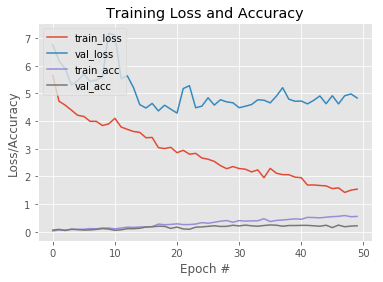

In [24]:
plt.style.use("ggplot")
plt.figure()
N = 50
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig(project_path+"loss.jpg")

In [4]:
from keras.models import load_model


1
[INFO] loading network...


/home/mate/.virtualenvs/deeplearn_cpu/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.0 when using version 0.19.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


[INFO] classifying image...
27
[INFO] 27


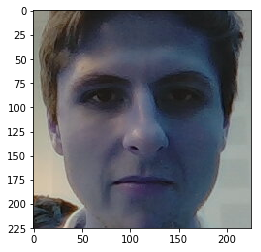

In [16]:

# load the image
image = cv2.imread(project_path+"me2.jpg")

face_cascade = cv2.CascadeClassifier('detector/haarcascade_frontalface_default.xml')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 5)

bb = []
i = 0
for (x,y,w,h) in faces:
    bb.append([w * h, i])
    #cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
 #   roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    i += 1
    print(i)
    break
#     cv2.imshow("faces/"+path, roi_color)
#         plt.figure()
#         plt.imshow(roi_color)

output = roi_color.copy()


# pre-process the image for classification
image = cv2.resize(image, (96, 96))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

# load the trained convolutional neural network and the label
# binarizer
print("[INFO] loading network...")
model = load_model(project_path+"model.hdf5")
lb = pickle.loads(open(project_path+"label.label", "rb").read())
 
# classify the input image
print("[INFO] classifying image...")
proba = model.predict(image)[0]
idx = np.argmax(proba)
label = lb.classes_[idx]
print(label)
# build the label and draw the label on the image
# label = "{}: {:.2f}% ({})".format(label, proba[idx] * 100, correct)
# output = imutils.resize(output, width=400)
# cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
# 	0.7, (0, 255, 0), 2)
 
# show the output image
print("[INFO] {}".format(label))
plt.imshow(output)